In [ ]:
from lambeq import QuantumTrainer, SPSAOptimizer, Dataset
import numpy as np
import csv
from fidelity_trainer import FidelityModel, fidelity_pqc_gen

In [2]:
# Parse Train Data
with open("data/train_data.csv", "r") as f:
    csvfile = csv.DictReader(f)
    train_pairs = [[item['sentence_1'], item['sentence_2']] for item in csvfile]
    f.seek(0)  # Rewind to beginning
    train_labels = [item['label'] for item in csvfile][1:] # Slicing ignores header

In [3]:
train_circuits = []
for sentence_1, sentence_2 in train_pairs:
    train_circuits.append(fidelity_pqc_gen(sentence_1, sentence_2))

In [4]:
def loss(predictions, labels):
    return np.mean(np.abs(predictions-labels))

In [9]:
EPOCHS=30

model = FidelityModel.from_diagrams(train_circuits)
trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.3, 'c': 0.06, 'A':0.01*EPOCHS},
)
train_dataset = Dataset(
        train_circuits,
        train_labels,
        batch_size=30)
# val_dataset = Dataset(
#         val_circuits,
#         val_labels,
#         shuffle=False)

trainer.fit(train_dataset, log_interval=1)

Epoch 1:   train/loss: 0.2838   valid/loss: -----   train/time: 54.21s   valid/time: -----


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
fig, (ax_t, ax_v) = plt.subplots(2, 1, sharex=True, sharey='row', figsize=(10, 6))
ax_t.set_title('Training set')
ax_v.set_title('Development set')
ax_t.set_xlabel('Epochs')
ax_v.set_xlabel('Epochs')
ax_t.set_ylabel('Loss')
ax_v.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_t.plot(trainer.train_epoch_costs, color=next(colours))
ax_v.plot(trainer.val_costs, color=next(colours))

In [ ]:
plt.plot(trainer.train_epoch_costs, label="train")
plt.plot(trainer.val_costs, label="val")
plt.legend()
plt.show()

In [ ]:
np.savetxt("VAL_COSTS-100-train_30-val_200_epochs_a-0.3_c-0.06.csv", trainer.val_costs, delimiter=',')

In [ ]:
model.save("best_fidelity_model.lt")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
costs = np.gen

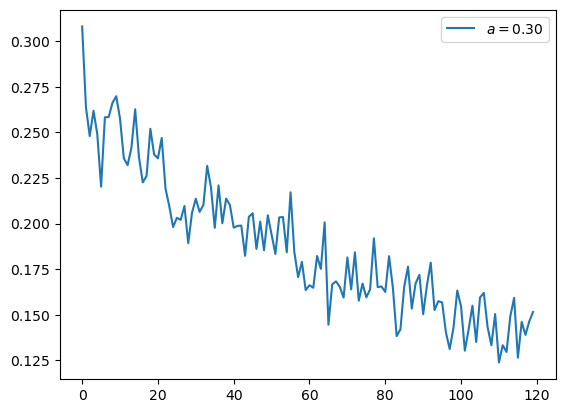

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a_05 = np.genfromtxt('data_from_trainer/30-sentences_a-0.05_c-0.06.csv', delimiter=',')
a_10 = np.genfromtxt('data_from_trainer/30-sentences_a-0.1_c-0.06.csv', delimiter=',')
a_15 = np.genfromtxt('data_from_trainer/30-sentences_a-0.15_c-0.06.csv', delimiter=',')
a_20 = np.genfromtxt('data_from_trainer/30-sentences_a-0.2_c-0.06.csv', delimiter=',')
a_30 = np.genfromtxt('data_from_trainer/30-sentences_a-0.3_c-0.06.csv', delimiter=',')
a_40 = np.genfromtxt('data_from_trainer/30-sentences_a-0.4_c-0.06.csv', delimiter=',')
a_50 = np.genfromtxt('data_from_trainer/30-sentences_a-0.5_c-0.06.csv', delimiter=',')
a_100 = np.genfromtxt('data_from_trainer/30-sentences_a-1.0_c-0.06.csv', delimiter=',')

# plt.plot(a_05, label="$a=0.05$")
# plt.plot(a_10, label="$a=0.10$")
# plt.plot(a_15, label="$a=0.15$")
# plt.plot(a_20, label="$a=0.20$")
plt.plot(a_30, label="$a=0.30$")
# plt.plot(a_40, label="$a=0.40$")
# plt.plot(a_50, label="$a=0.50$")
# plt.plot(a_100, label="$a=1.0$")
plt.legend()
plt.show()

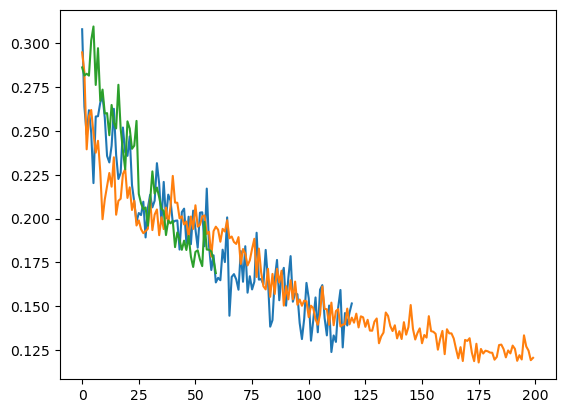

In [8]:
a_30_30_sentences = np.genfromtxt('data_from_trainer/30-sentences_a-0.3_c-0.06.csv', delimiter=',')
a_30_100_sentences = np.genfromtxt('data_from_trainer/100-sentences_200_epochs_a-0.3_c-0.06.csv', delimiter=',')
a_35_60_sentences = np.genfromtxt('data_from_trainer/100-sentences_60_epochs_a-0.35_c-0.06.csv', delimiter=',')
plt.plot(a_30_30_sentences, label="30 sentences")
plt.plot(a_30_100_sentences, label="100 sentences" )
plt.plot(a_35_60_sentences)